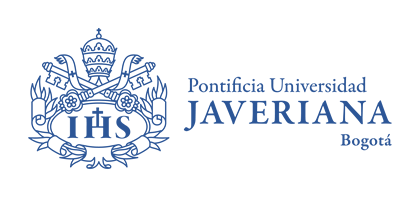

# Aprendizaje Profundo - Redes neuronales artificiales
Este notebook tiene como objetivo familiarizar al estudiante con los modelos de redes neuronales de perceptrón y MLP (Multi-Layer perceptron) utilizando ejemplos en Python


## Presentado por:
### Cristian Cristancho
### Nikolas Rodriguez

## Setup
Se instalan y se importan las librerías necesarias para el ejercicio

In [1]:
import numpy as np
from tqdm import tqdm
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
sklearn.__version__

'0.24.1'

## Conjunto de datos - Generación de datos sintéticos

Inicialmente crearemos 2 conjuntos de datos sintéticos, uno linealmente separable y el otro no




In [3]:
N=300

In [4]:
# Creación del dataset aleatorio
X_ejemplo1 , y_true = make_blobs(n_samples=N, centers=2,
                       cluster_std=0.4, random_state=0)

In [5]:
# Intercambio X[0] y X[1]
X_ejemplo1 = X_ejemplo1[:, ::-1] 

In [6]:
shuffler = np.random.permutation(len(y_true))
X_ejemplo1 = X_ejemplo1[shuffler]
y_true = y_true[shuffler]

y_true = np.reshape(y_true, (y_true.shape[0],1))

In [7]:
X_ejemplo1.shape

(300, 2)

In [8]:
y_true.shape

(300, 1)

(-0.5933124636807415,
 5.402103373690825,
 -0.20385999729940874,
 3.2926912919705824)

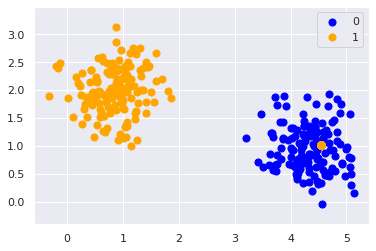

In [10]:
# Visualizamos los puntos

ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()
plt.axis("equal")


## Generamos segundo dataset

In [11]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_ejemplo2, y_true2 = twospirals(N)

In [12]:
shuffler = np.random.permutation(len(y_true2))
X_ejemplo2 = X_ejemplo2[shuffler]
y_true2 = y_true2[shuffler]
y_true2 = np.reshape(y_true2, (y_true2.shape[0],1))

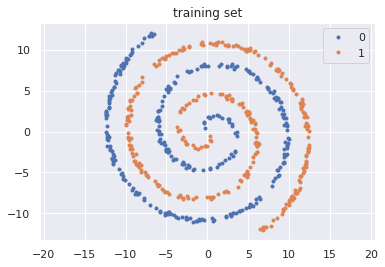

In [13]:
plt.title('training set')
plt.plot(X_ejemplo2[y_true2[:, 0]==0,0], X_ejemplo2[y_true2[:, 0]==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2[:, 0]==1,0], X_ejemplo2[y_true2[:, 0]==1,1], '.', label=1)
plt.legend()
plt.axis("equal")
plt.show()

# Tareas: 
* Dividir datasets train - test
* Crear capa de con perceptrón simple y probar su desempeño
* Crear arreglo de capas ReLu y una capa final sigmoide
* Implementar forward y backward propagation
* Probar el desempeño

In [14]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_ejemplo1, y_true, test_size=0.20, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_ejemplo2, y_true2, test_size=0.20, random_state=42)

In [15]:
X1_train.shape

(240, 2)

In [16]:
X1_test.shape

(60, 2)

In [17]:
Y1_train.shape

(240, 1)

##  1. Crear capa perceptrón simple y probar su desempeño

El primer modelo a probar es una capa de perceptron simple, complete las instrucciones que dicen TODO:

In [18]:
class Perceptron(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización del perceptrón 
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial
        
        """ 
        ulabels = np.unique(labels)
        
        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1) 
        self.labels = labels
        # Reemplazamos el 0 por -1
        self.labels[self.labels==0]=-1
        # Inicialización aleatoria 
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 10):
        """
        Inicialización del perceptrón 
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas 
        
        """ 
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                if np.sign(np.dot(sample, self.weights))!= np.sign(label):
                  self.weights += learning_rate * label
                  errs += 1
                  print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass      

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """ 
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        
        predicts= X @ self.weights
        # Reemplazamos de vuelta el -1 por 0
        predicts[predicts==-1]=0
        return predicts

## Metricas

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

In [59]:
def get_metricas(y_true, y_pred):

  print("""
  Exactitud: """ + str(accuracy_score(y_true, y_pred)) + """
  Precision: """ + str(precision_score(y_true, y_pred)) + """
  Recuperacion: """ + str(recall_score(y_true, y_pred)) + """
  """)

  ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

## Entrenamiento del primer perceptron con el Blob Dataset

In [87]:
p = Perceptron(X1_train,Y1_train)

In [88]:
p.train(learning_rate = 0.1)

Error in iteration 1 sample id 0
Error in iteration 1 sample id 2
Error in iteration 1 sample id 3
Error in iteration 1 sample id 8
Error in iteration 1 sample id 9
Found a boundary in 2 iterations.


In [89]:
Y1_test_predict_perceptron = p.predict(X1_test)
Y1_test_predict_perceptron = np.reshape(Y1_test_predict_perceptron, (Y1_test_predict_perceptron.shape[0],1))
Y1_test_predict_perceptron = 1*(Y1_test_predict_perceptron>0)



  Exactitud: 1.0
  Precision: 1.0
  Recuperacion: 1.0
  


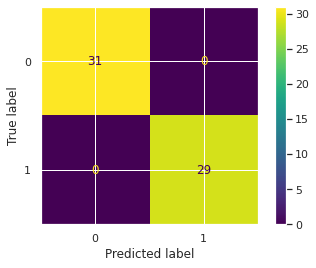

In [90]:
get_metricas(Y1_test, Y1_test_predict_perceptron)

### Frontera de decisión del modelo

In [91]:
p.weights

array([ 0.16081063, -0.13391243,  0.11118146])

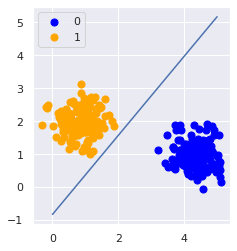

In [96]:
_x = np.linspace(0,5,100)
frontera_activacion_p1 = lambda x: -(p.weights[0]/p.weights[1])*x + (p.weights[2]/p.weights[1])

plt.plot(_x,frontera_activacion_p1(_x))

ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()

Compare utilizando las métricas precision y recall 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [97]:
p2= Perceptron(X2_train,Y2_train)

In [98]:
p2.train(learning_rate = 0.1)

Error in iteration 1 sample id 1
Error in iteration 1 sample id 4
Error in iteration 1 sample id 6
Error in iteration 1 sample id 9
Error in iteration 1 sample id 12
Error in iteration 1 sample id 16
Error in iteration 1 sample id 17
Error in iteration 1 sample id 18
Error in iteration 1 sample id 19
Error in iteration 1 sample id 21
Error in iteration 1 sample id 24
Error in iteration 1 sample id 25
Error in iteration 1 sample id 27
Error in iteration 1 sample id 30
Error in iteration 1 sample id 32
Error in iteration 1 sample id 36
Error in iteration 1 sample id 39
Error in iteration 1 sample id 41
Error in iteration 1 sample id 42
Error in iteration 1 sample id 44
Error in iteration 1 sample id 48
Error in iteration 1 sample id 53
Error in iteration 1 sample id 54
Error in iteration 1 sample id 56
Error in iteration 1 sample id 57
Error in iteration 1 sample id 58
Error in iteration 1 sample id 63
Error in iteration 1 sample id 64
Error in iteration 1 sample id 65
Error in iteration

In [99]:
Y2_test_predict_perceptron = p2.predict(X2_test)
Y2_test_predict_perceptron = np.reshape(Y2_test_predict_perceptron, (Y2_test_predict_perceptron.shape[0],1))
Y2_test_predict_perceptron = 1*(Y2_test_predict_perceptron>0)


  Exactitud: 0.375
  Precision: 0.4
  Recuperacion: 0.2727272727272727
  


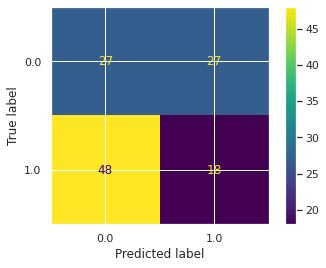

In [101]:
get_metricas(Y2_test, Y2_test_predict_perceptron)

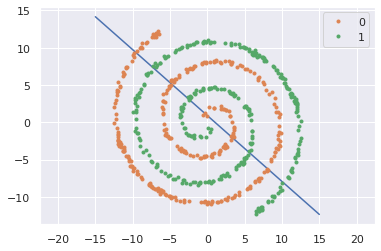

In [103]:
_x = np.linspace(-15,15,100)
frontera_activacion_p2 = lambda x: -(p2.weights[0]/p2.weights[1])*x + (p2.weights[2]/p2.weights[1])

plt.plot(_x,frontera_activacion_p2(_x))

plt.plot(X_ejemplo2[y_true2[:, 0]==0,0], X_ejemplo2[y_true2[:, 0]==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2[:, 0]==1,0], X_ejemplo2[y_true2[:, 0]==1,1], '.', label=1)
plt.legend()
plt.axis("equal")
plt.show()

##  2. Crear red neuronal profunda y probar su desempeño

El segundo modelo a probar es una red neuronal profunda.

Vamos a crear la clase DenseLayer que tiene los elementos que vamos a necesitar, debe completar los elementos $W$, $b$ , $dz$ y $da$ de la capa.

In [170]:
class DenseLayer(object):

    def __init__(self, n_inputs, n_neurons,  activation='sigmoid'):
      """
      Inicialización de la capa con pesos iniciales aleatorios 
      Parametros:
      activation -- función de activación ReLu o sigmoide
      n_inputs -- número de inputs de la capa
      n_neurons -- número de unidades neuronales de la capa
      
      """ 
      # Inicialización de matriz W
      self.W= np.random.randn(n_inputs, n_neurons) * 2 - 1
      # Inicialización de bias 
      self.b = np.random.rand(1,n_neurons) * 2 - 1

      # Definición Z (todavía no sabemos tamaño)
      self.Z=None

      # Definición A
      self.A= None

      # Definición dA
      self.dA= None

      # Definición dZ
      self.dZ= None
      

      if activation=='ReLu' or activation=='sigmoid':
        self.activation= activation
      else:
        raise Exception("activation not implemented")

    def ReLu(self, input):
      return np.maximum(0,input)

    def ReLuPrima(self, input):
      return ((input > 0)*1)

    def Sigmoid(self, input):
      return 1 / (1 + np.e ** (-input))

    def SigmoidPrima(self, input):
      return (input * (1 - input))

    def activation_func(self, input):

      if self.activation=='sigmoid':
        return self.Sigmoid(input)
      else:
        # Función de activación ReLu
        return self.ReLu(input)

    def activation_func_prima(self, input):

      if self.activation=='sigmoid':
        return self.SigmoidPrima(input)
      else:
        # derivada Función de activación ReLu
        return self.ReLuPrima(input)


    def forward(self, input):
      """
      Paso forward sobre la capa
      Parametros:
      input -- activación de la capa anterior
      
      Returns:
      Z - Salida de los pesos
      A - Activación de la capa
      """
      self.Z = input @ self.W + self.b

      self.A = self.activation_func(self.Z)

      return (self.Z, self.A)  


    def backward(self, dA, A_l1, learning_rate=0.001):
      """
      Paso backward sobre la capa
      Parametros:
      dA -- derivada parcial con respecto a la activación calculada por la capa siguiente anteriormente
      A_l1 -- Activación de la capa anterior
      learning_rate -- Paso de ajuste de los pesos de la capa
      Returns:
      dA_l1 - Derivada de la activación de la capa
      """
      
      self.dA=dA

      self.dZ = self.activation_func_prima(self.A)

      dA_l1 = self.dA * self.dZ

      dW= A_l1.T @ dA_l1
      db= np.mean(dA_l1, axis=0, keepdims=True)
      

      self.W= self.W - learning_rate * dW#TODO
      self.b= self.b - learning_rate * db#TODO


      return dA_l1   



In [160]:
l2_loss = (lambda Yreal, Ypredicha: np.mean((Yreal-Ypredicha)**2),
          lambda Yreal, Ypredicha: (Yreal-Ypredicha))


binary_cross_entropy_loss = (lambda Yreal, Ypredicha: -1*np.mean( Yreal*np.log(Ypredicha) + (1-Yreal)*np.log(1-Ypredicha)),
                            lambda Yreal, Ypredicha: (-Yreal/Ypredicha) + ((1 - Yreal)/(1 - Ypredicha)))

In [312]:
def train_nn(model, X, Y, epochs, learning_rate, loss):

  losses = []

  for epoch in tqdm(range(epochs)):

    # Forward propagation

    outs = [(None, X)]

    for layer in range(len(model)):

      z,a = model[layer].forward(outs[-1][1])
      outs.append((z,a))

    # Backward pass

    deltas = []

    for layer in reversed(range(0, len(model))):

      z = outs[layer+1][0]
      a = outs[layer+1][1]

      if layer == len(model) - 1:
        # Calcular ultima capa

        da = loss[1](a, Y) # Derivada de la salida respecto a la activacion de la ultima capa
        a_1 = outs[layer][1] #Activacion de la capa anterior

        delta = model[layer].backward(da, a_1, learning_rate)
        deltas.insert(0, delta)

      else:
        #Calcular respecto a la capa previa

        da = deltas[0] @ _W.T # Derivada de la salida respecto a la activacion de la ultima capa
        a_1 = outs[layer][1] #Activacion de la capa anterior

        delta = model[layer].backward(da, a_1, learning_rate)
        deltas.insert(0, delta)

      _W = model[layer].W

    
    losses.append(loss[0](outs[-1][1], Y))


  x = np.linspace(0,epochs,epochs)
  y = losses

  plt.plot(x, y)
  plt.title('Train loss')
  plt.show()


  Y_hat = 1*(outs[-1][1]>0.5)

  print('Metricas en entrenamiento')
  get_metricas(Y, Y_hat)



  return model


def predict_nn(model, X):

  outs = [(None, X)]

  for layer in range(len(model)):

    z,a = model[layer].forward(outs[-1][1])
    outs.append((z,a))

  Y_hat = 1*(outs[-1][1]>0.5)

  return Y_hat

## Primer Dataset, blobs

100%|██████████| 100/100 [00:00<00:00, 3974.25it/s]


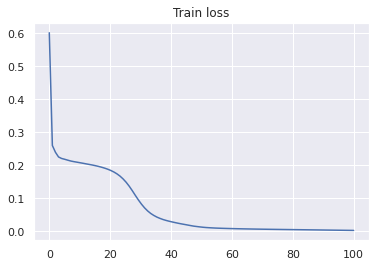

Metricas en entrenamiento

  Exactitud: 0.9958333333333333
  Precision: 1.0
  Recuperacion: 0.991869918699187
  


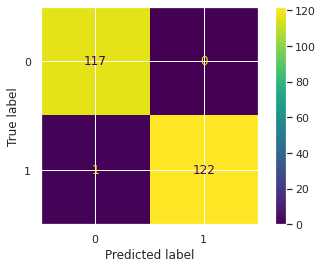

In [221]:
# Build model

L1=DenseLayer(2,3,'ReLu')
L2=DenseLayer(3,1)
model_blobs=[L1,L2]

# TODO: Pasar por L1 y L2 durante 100 epocas con Learning Rate 0.01

epochs = 100
lr = 0.01

model_blobs = train_nn(model_blobs, X1_train,Y1_train, epochs, lr, l2_loss)

# TODO: Medir el performance del modelo

Metricas en test

  Exactitud: 1.0
  Precision: 1.0
  Recuperacion: 1.0
  


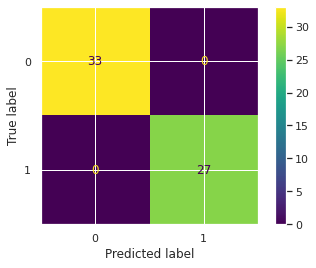

In [223]:
Y1_test_nn = predict_nn(model_blobs, X1_test)
print('Metricas en test')
get_metricas(Y1_test, Y1_test_nn)

## Dataset 2, Spiral

100%|██████████| 500/500 [00:00<00:00, 2541.01it/s]


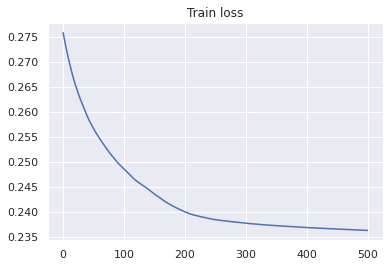

Metricas en entrenamiento

  Exactitud: 0.6104166666666667
  Precision: 0.5774193548387097
  Recuperacion: 0.7617021276595745
  


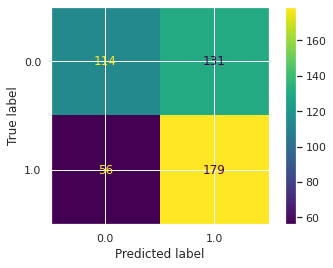

In [319]:
# Build model

L1 = DenseLayer(2,10,'ReLu')
L2 = DenseLayer(10,10,'ReLu')
L3 = DenseLayer(10,1)
model_spiral=[L1,L2,L3]

# TODO: Pasar por L1 y L2 durante 100 epocas con Learning Rate 0.01

epochs = 500
lr = 0.0001

model_spiral = train_nn(model_spiral, X2_train/15, Y2_train, epochs, lr, l2_loss)

Metricas en test

  Exactitud: 0.6166666666666667
  Precision: 0.6557377049180327
  Recuperacion: 0.6153846153846154
  


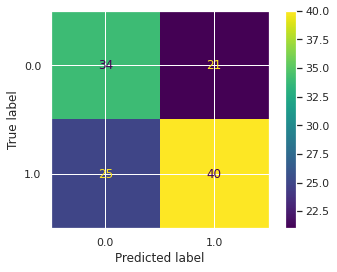

In [320]:
Y2_test_nn = predict_nn(model_spiral, X2_test)
print('Metricas en test')
get_metricas(Y2_test, Y2_test_nn)